In [1]:
import pandas as pd # type: ignore

In [3]:
data = pd.read_csv("train.csv") 

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Data Processing and Cleaning
print(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
# Dropping the columns that are not relevant
data=data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [8]:
# Missing Values
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

# For Categorical Columns fill missing values with most frequent value
mode_value = data['MasVnrType'].mode()[0]
data['MasVnrType'].fillna(mode_value,inplace=True)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10408\1432226950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10408\1432226950.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [9]:
# Selecting features and target
features = data[['GrLivArea','BedroomAbvGr','BsmtFullBath']]
target = data['SalePrice']

# Split the data into traning and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression Model 
model = LinearRegression()

# Train the Model
model.fit(X_train,y_train) 

LinearRegression()

In [11]:
# Make Predictions
predictions = model.predict(X_test)

# Evaluate The Model
from sklearn.metrics import mean_squared_error , r2_score

# calculate Mean Squared error
mse = mean_squared_error(y_test,predictions)

# Calculate the R-Squared
r2 = r2_score(y_test,predictions)

print(f"Mean Squared Error:{mse}")
print(f"R-Squared:{r2}")

Mean Squared Error:2814423049.382982
R-Squared:0.6330764854895146


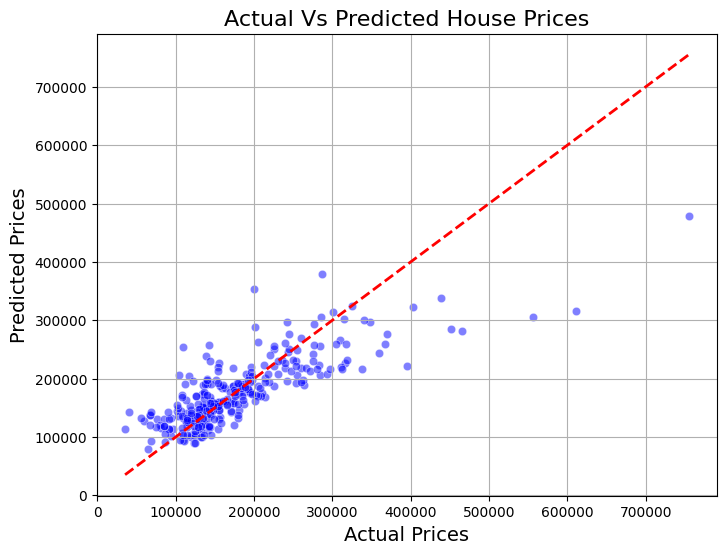

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test , y=predictions  ,color='blue', alpha=0.5)

# Add Line of perfect predictions
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red',linestyle='--',lw=2)

# Titles and Labels
plt.title("Actual Vs Predicted House Prices",fontsize=16)
plt.xlabel("Actual Prices",fontsize=14)
plt.ylabel("Predicted Prices",fontsize=14)
plt.grid(True)

#show Plot
plt.show()